# Practica Investigativa: Computación Cuántica
### QISKIT

Qiskit es una herramienta desarrollada por ibm, está disponible en el lenguaje python para describir circuitos cuanticos en forma de codigo en alto nivel. Se pueden declarar registros de qubits e interactuar con ellos aplicando compuertas. Más documentación en https://qiskit.org/

### Prerrequisitos

- Instalar python anaconda de la pagina oficial: https://www.anaconda.com/download/

Acceder a la terminal de anaconda e ingresar:

- pip install qiskit

- Ibm también ofrece una [guia de usuario](https://quantumexperience.ng.bluemix.net/qx/tutorial?sectionId=full-user-guide&page=introduction) completa para empezar en el mundo de la computación cuántica

### Iniciando a programar

Principalmente debemos importar los paquetes de python que nos servirán para modelar un circuito cuantico con qubits, compuertas, etc:



In [1]:
from qiskit import ClassicalRegister, QuantumRegister
from qiskit import QuantumCircuit, execute
from qiskit.tools.visualization import plot_histogram, circuit_drawer

Debemos tener en cuenta:

- *ClassicalRegister*: es un registro de enteros donde irá la medición de los qubits en una ejecución.
- *QuantumRegister*: es un registro que representa la cantidad de qubits a usar.
- *QuantumCircuit*: representa un circuito donde se aplicarán las compuertas respectivas a los qubits.
- *execute*: es un metodo del kit el cual nos permite ejecutar un circuito cuantico, se le especifica:
  - **backend**: simulador local, en la nube o enviar los datos a un computador cuántico
  - **shots**: número de ejecuciones para poder determinar una distribución de probabilidad de que salida da el circuito
  - **max_credits**: es una caracteristica implementada para regular el uso de experimentos diarios en la nube, cada usuario común tiene maximo 15 creditos y un uso por experimento de 3 ó 5 creditos.
- *plot_histogram*: es un método el cual nos permite generar la grafica de distribución de probabilidad de la ejecución de un circuito
- *circuit_drawer*: como su nombre lo dice, es un método el cual nos permite graficar el circuito que acabamos de modelar

#### Circuito de ejemplo:

In [2]:
q = QuantumRegister(2)
c = ClassicalRegister(2)
qc = QuantumCircuit(q, c)
qc.h(q[0])
qc.cx(q[0], q[1])
qc.measure(q, c)

#### Guardamos la ejecución del circuito:

In [3]:
job_exp = execute(qc, backend="local_qasm_simulator", shots=1024, max_credits=3)

#### Imprimimos el histograma:

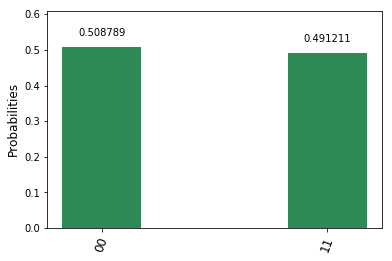

You have made entanglement!


In [4]:
plot_histogram(job_exp.result().get_counts(qc))
print('You have made entanglement!')

Observaciones:

En el circuito de ejemplo modelamos lo que se considera entrelazamiento. 

El qubit 0 lo pusimos en superposición aplicando la compuerta hadamard, teóricamente la mitad de las veces que se ejecute el circuito el qubit 0 obtendrá un valor de 0 y la otra mitad obtendrá un valor de 1. Esto lo pudimos corroborar en el histograma.

La salida del qubit 1 está condicionada por el qubit 0, esto lo logramos utilizando la compuerta CNOT la cual hace un flip sobre el qubit 1 si el qubit 0 tiene un valor de 1 (estado 11) y no hace nada si el qubit 0 tiene un valor de 0 (estado 00), sin embargo esta combinación no la sabemos hasta haber medido el qubit 0 y colapsado su estado de superposición.


#### Imprimimos el circuito

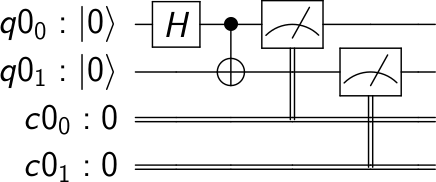

In [5]:
circuit_drawer(qc)